# Подготовка данных

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('kickstarter.csv')
# чтение загруженного в коллаб файла по его названию

In [ ]:
df_2 = df.copy(deep=True)
# создание копии исходного датафрейма чтобы не повредить исходный вариант

In [ ]:
df_2 = df_2[df_2['goal'] > 1]
# очистка данных от выбросов: создание нового датафрейма с целью проекта набрать больше 1 доллара

# Проверка необходимого условия для подсчёта через k-средние

In [ ]:
sum_genre = df_2['rpg'] + df_2['platformer'] + df_2['shooter'] + df_2['fighting'] + df_2['survival'] + df_2['horror'] + df_2['strategy'] + df_2['arcade'] + df_2['simulator'] + df_2['mmo'] + df_2['indie']+ df_2['action']+ df_2['quest']+ df_2['adventure']
# создание переменной типа Series со значениями - количеством указанных авторами жанров игры

In [ ]:
df_2['genre'] = sum_genre
# добавление к датафрейму столбца, в строчках которого - количество указанных авторами жанров игры

In [ ]:
our_success = df_2['pled'] / df_2['goal']

In [ ]:
df_2['our_success'] = our_success

In [ ]:
df_out = df_2[df_2['genre'] == 0.0]
# создание датафрейма с проектами которые не указали ни одного жанра о своей игре

In [ ]:
df_with = df_2[df_2['genre'] > 0.0]
# создание датафрейма с проектами которые указали хотя бы один жанр своей игры

## Проверка на нормальное распределение проектов с указанием на жанры и без указания

### По оси х показатель pled/goal

In [ ]:
max(df_with['our_success'])
# чтобы понять верхнюю границу графика по оси х на будущей гистаграмме находим максимальное значение pled/goal проектов c указанием на жанры

432.9224030037547

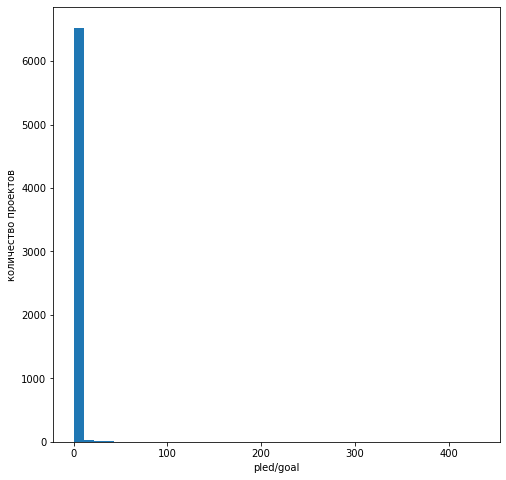

In [ ]:
plt.figure(figsize=(8, 8))
# создание с помощью библиотеки матплотлиб окна для рисования размером 8*8 дюймов
plt.xlabel("pled/goal")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 433, df_with['our_success']), bins = 20)
# создание с помощью библиотеки матплотлиб гистограммы с 20 столбцами и промежутком по оси х от 0 до 433
plt.show()
# (0, 433) - неинформативный промежуток, рассмотрим на (0, 50)

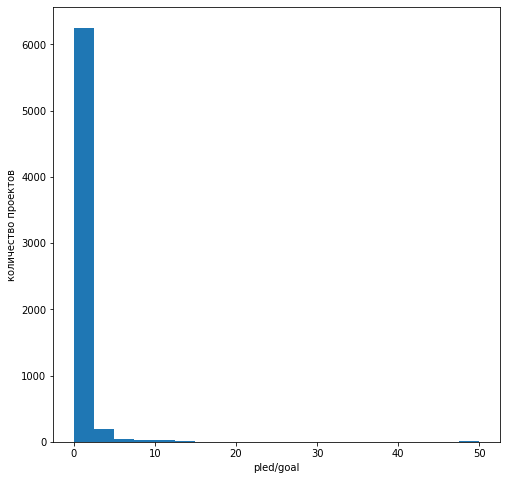

In [ ]:
plt.figure(figsize=(8, 8))
# создание с помощью библиотеки матплотлиб окна для рисования размером 8*8 дюймов
plt.xlabel("pled/goal")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 50, df_with['our_success']), bins = 20)
# создание с помощью библиотеки матплотлиб гистограммы с 20 столбцами и промежутком по оси х от 0 до 50
plt.show()
# согласно гистаграмме нормального распределения у проектов с указанием жанров нет

In [ ]:
max(df_out['our_success'])
# чтобы понять верхнюю границу графика по оси х на будущей гистаграмме находим максимальное значение pled/goal проектов без указания на жанры

545.7333333333333

In [ ]:
# df_out[df_out['our_success'] == 545.7333333333333]
# проверка (для себя) существования такого выброса

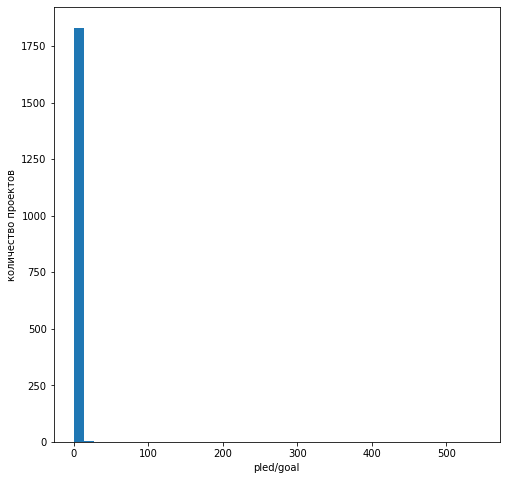

In [ ]:
plt.figure(figsize=(8, 8))
# создание с помощью библиотеки матплотлиб окна для рисования размером 8*8 дюймов
plt.xlabel("pled/goal")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 545, df_out['our_success']), bins = 40)
# создание с помощью библиотеки матплотлиб гистограммы с 40 столбцами и промужутком по оси х от 0 до 545
plt.show()
# (0, 545) - неинформативный промежуток, рассмотрим на (0, 50)

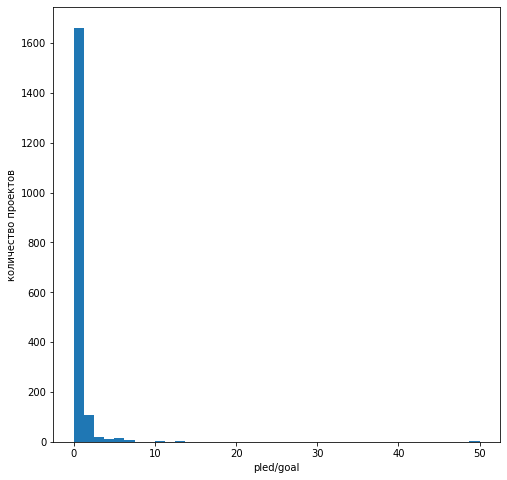

In [ ]:
plt.figure(figsize=(8, 8))
# создание с помощью библиотеки матплотлиб окна для рисования размером 8*8 дюймов
plt.xlabel("pled/goal")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 50, df_out['our_success']), bins = 40)
# создание с помощью библиотеки матплотлиб гистограммы с 40 столбцами и промужтком по оси х от 0 до 50
plt.show()
# согласно гистаграмме нормального распределения у проектов без указания жанров нет

### По оси х показатель - pled

In [ ]:
max(df_with['pled'])
# чтобы понять верхнюю границу графика по оси х на будущей гистаграмме находим максимальную набранную сумму проектов с указанием на жанры

6333295.0

In [ ]:
plt.figure(figsize=(8, 8))
plt.xlabel("pled")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 6333295, df_with['pled']), bins = 20)
plt.show()
# в основном набранная сумма не превышает 3000000 доларов (на графике 3), далее посмотрим что в диапозоне (0, 3 * 10^6) происходит

In [ ]:
plt.figure(figsize=(8, 8))
plt.xlabel("pled")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 3000000, df_with['pled']), bins = 40)
plt.show()
# согласно гистаграмме нормального распределения у проектов с указанными жанрами нет

In [ ]:
max(df_out['pled'])
# чтобы понять верхнюю границу графика по оси х на будущей гистаграмме находим максимальную набранную сумму проектов без указания на жанры

1255444.0

In [ ]:
plt.figure(figsize=(8, 8))
plt.xlabel("pled")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 1255444, df_out['pled']), bins = 30)
plt.show()
# в основном набранная сумма не превышает 0,4 * 10^6 доларов (на графике 0,4), далее посмотрим что в диапозоне (0, 0,4 * 10^6) происходит

In [ ]:
plt.figure(figsize=(8, 8))
plt.xlabel("pled")
# подписываем ось Х
plt.ylabel("количество проектов")
# подписываем ось У
our_hist = plt.hist(np.clip(0, 400000, df_out['pled']), bins = 40)
plt.show()
# согласно гистаграмме нормального распределения у проектов без указания жанров нет